# Manipulation de données Python avec `pandas` : Partie 1
* * *
<div class="alert alert-success">  
    
### Objectifs d'apprentissage
### 学习目标
    
* Se familiariser avec `pandas` et l'objet central `DataFrame`
* 熟悉 `pandas` 和核心对象 `DataFrame`
* Appliquer les techniques de base de manipulation de données dans `pandas`
* 应用 `pandas` 中的基本数据处理技术
* Comprendre la flexibilité de la bibliothèque `pandas`
* 理解 `pandas` 库的灵活性
</div>

## Importation et visualisation des données
## 数据的导入和可视化
Nous allons travailler avec [des données sur le chômage européen provenant d'Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Unemployment_statistics). Il existe plusieurs fichiers `.csv` liés à ce thème avec lesquels nous travaillerons dans ce sujet, tous relatifs aux taux de chômage dans les pays européens.

我们将使用[来自 Eurostat 的欧洲失业数据](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Unemployment_statistics)。在这个主题中，我们将处理几个与此主题相关的 `.csv` 文件，它们都与欧洲国家的失业率有关。\n

Commençons par importer `pandas` en utilisant l'abréviation conventionnelle `pd`.
让我们首先使用惯用的缩写 `pd` 导入 `pandas`。

In [1]:
# Importer pandas avec l'alias `pd`
# 使用别名 `pd` 导入 pandas
import pandas as pd

# Nous importons souvent NumPy (numerical python) avec pandas
# 我们经常将 NumPy (numerical python) 与 pandas 一起导入
# nous l'importons avec l'alias `np`
# 我们使用别名 `np` 导入它
import numpy as np

`pandas` possède une fonction `read_csv()` qui nous permet d'importer facilement des données tabulaires. La fonction retourne un objet `DataFrame`, qui est l'objet principal que `pandas` utilise pour représenter les données tabulaires.

`pandas` 有一个 `read_csv()` 函数，允许我们轻松导入表格数据。该函数返回一个 `DataFrame` 对象，这是 `pandas` 用于表示表格数据的主要对象。\n

La fonction `pd.read_csv` peut être paramétrée pour s'adapter à différents types de fichiers csv. Ici, nous sommes obligé de spécifier le séparateur car pandas utilise la virgule par défaut.
可以对 `pd.read_csv` 函数进行参数设置以适应不同类型的 csv 文件。在这里，我们要强制指定分隔符，因为 pandas 默认使用逗号。

In [9]:
unemployment = pd.read_csv('../Data/tp2-3/unemployment.csv',sep=",")

Vous avez créé un `DataFrame` `pandas`. Nous pouvons examiner nos données en utilisant la méthode `.head()`. Par défaut, cela affiche l'en-tête (noms des colonnes) et les **cinq** premières lignes.

您已经创建了一个 `pandas` `DataFrame`。我们可以使用 `.head()` 方法检查我们的数据。默认情况下，这会显示标题（列名）和**前五**行。\n

Si vous souhaitez voir un autre nombre de lignes, vous pouvez passer un entier à .head() pour retourner ce nombre de lignes. Par exemple, unemployment.head(6) retournerait les six premières lignes.
如果您想查看不同数量的行，可以将一个整数传递给 .head() 以返回该数量的行。例如，unemployment.head(6) 将返回前六行。

In [10]:
unemployment.head(6)

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
0,at,sa,1993.01,144000,3.8,1/1/1993,1993,1
1,at,sa,1993.02,145000,3.8,2/1/1993,1993,2
2,at,sa,1993.03,147000,3.9,3/1/1993,1993,3
3,at,sa,1993.04,149000,3.9,4/1/1993,1993,4
4,at,sa,1993.05,151000,4.0,5/1/1993,1993,5
5,at,sa,1993.06,152000,4.0,6/1/1993,1993,6


Pour trouver le nombre de lignes, vous pouvez utiliser l'attribut `.shape`, qui retourne un tuple : `(nombre de lignes, nombre de colonnes)`
要查找行数，您可以使用 `.shape` 属性，它返回一个元组：`(行数, 列数)`\n

In [11]:
unemployment.shape

(6438, 8)

Pour connaître les noms des colonnes, vous pouvez utiliser l'attribut `.columns`.
要了解列名，您可以使用 `.columns` 属性。

In [12]:
unemployment.columns

Index(['country', 'seasonality', 'year_month', 'unemployment',
       'unemployment_rate', 'date', 'year', 'month'],
      dtype='str')

Pour connaître les types de données, nous utilisons l'attribut `.dtypes`, qui nous indique quelles colonnes contiennent des données numériques (par ex. types `float64` ou `int64`) et lesquelles contiennent du texte (par ex. types `object`)
要了解数据类型，我们使用 `.dtypes` 属性，它告诉我们哪些列包含数值数据（例如 `float64` 或 `int64` 类型），哪些列包含文本（例如 `object` 类型）

In [13]:
unemployment.dtypes

country                  str
seasonality              str
year_month           float64
unemployment           int64
unemployment_rate    float64
date                     str
year                   int64
month                  int64
dtype: object

## Fonction de statistiques de base
## 基本统计函数

La  méthode `describe()` génère diverses statistiques décrivant le dataframe. C'est une méthode puissante qui retournera beaucoup d'informations, alors avant de l'exécuter, voyons exactement ce qu'elle fait.

`describe()` 方法生成描述 dataframe 的各种统计信息。这是一个强大的方法，它将返回大量信息，所以在运行它之前，让我们看看它具体是做什么的。

💡 **Astuce** : La [documentation `pandas`](http://pandas.pydata.org/pandas-docs/stable/) contient des informations exhaustives sur chaque fonction, objet, etc. dans `pandas`. Elle peut être un peu difficile à naviguer seule, il est donc typique d'interagir avec la documentation principalement via des recherches Google.

💡 **提示**：[`pandas` 文档](http://pandas.pydata.org/pandas-docs/stable/) 包含有关 `pandas` 中每个函数、对象等的详尽信息。单独浏览可能有点困难，因此通常主要通过 Google 搜索与文档交互。

Voici un flux de travail général pour en apprendre davantage sur une fonction dans `pandas` :
这里有一个通用的工作流程，用于了解 `pandas` 中的函数：
1. Recherchez la fonction `pandas` sur Google, par ex. "pandas {insérer le nom de la fonction}"
1. 在 Google 上搜索 `pandas` 函数，例如 "pandas {插入函数名称}"
2. Trouvez un résultat de pandas.pydata.org (la documentation pandas)
2. 找到 pandas.pydata.org（pandas 文档）的结果
3. Lisez le résumé de ce que fait la fonction (en haut de la page), examinez ses arguments et ce qu'elle retourne.
3. 阅读函数功能的摘要（在页面顶部），检查它的参数以及它的返回值。

<span color="purple">📝 **Question :** Avant d'exécuter le code suivant, essayez d'utiliser le flux de travail général détaillé ci-dessus pour découvrir ce que `.describe()` retourne. </span>
<span color="purple">📝 **问题**：在运行以下代码之前，尝试使用上面详细介绍的通用工作流程来找出 `.describe()` 返回的内容。</span>

In [14]:
unemployment.describe()

,year_month,unemployment,unemployment_rate,year,month
count,6438.000000,6.438000e+03,6116.000000,6438.000000,6438.000000
mean,1999.431230,8.173948e+05,8.165598,1999.369525,6.170550
std,7.466699,1.042835e+06,3.892202,7.466812,3.426694
min,1983.010000,2.000000e+03,1.300000,1983.000000,1.000000
25%,1994.090000,1.420000e+05,5.200000,1994.000000,3.000000
50%,2001.010000,3.155000e+05,7.600000,2001.000000,6.000000
75%,2006.010000,1.489500e+06,9.900000,2006.000000,9.000000
max,2010.120000,4.773000e+06,20.600000,2010.000000,12.000000


⚠️ **Avertissement** : `.describe()` se comportera différemment selon les types de vos données, ou `dtypes`. Si votre `DataFrame` inclut à la fois des `dtypes` numériques et object (par ex., chaînes), il résumera par défaut **uniquement les données numériques** (comme montré ci-dessus). Si `.describe()` est appelé sur un `DataFrame` qui contient uniquement des chaînes, il retournera le nombre, le nombre de valeurs uniques et la valeur la plus fréquente avec son nombre.
⚠️ **警告**：`.describe()` 的行为会有所不同，具体取决于您的数据类型或 `dtypes`。如果您的 `DataFrame` 同时包含数值和对象 `dtypes`（例如，字符串），它将默认**仅汇总数值数据**（如上所示）。如果对仅包含字符串的 `DataFrame` 调用 `.describe()`，它将返回计数、唯一值的数量以及最频繁出现的值及其计数。

## 🥊 Défi 1
## 🥊 挑战 1
**Configuration**  
**配置**
Nous avons précédemment importé des données sur le **chômage** dans `pandas` en utilisant la fonction `read_csv` et un chemin de fichier relatif. `read_csv` nous permet également d'importer des données en utilisant une URL comme chemin de fichier.

我们之前已经使用 `read_csv` 函数和相对文件路径将**失业**数据导入到 `pandas` 中。`read_csv` 还允许我们使用 URL 作为文件路径来导入数据。

Un fichier .csv avec des données sur les pays du monde et leurs abréviations se trouve à l'URL suivante :

一个包含世界各国及其缩写数据的 .csv 文件位于以下 URL：

[https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv](https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv)

Nous pouvons charger ces données directement comme suit :
我们可以直接加载这些数据，如下所示：

In [15]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/Python-Data-Wrangling/main/data/countries.csv'
countries = pd.read_csv(countries_url)

In [16]:
countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


**Défi**  
**挑战**
Chaque fois que nous ouvrons un nouveau DataFrame, il est important d'obtenir une compréhension de base de sa structure.

每次我们打开一个新的 DataFrame 时，了解其基本结构都很重要。

En utilisant les méthodes et attributs que nous venons de discuter, **répondez aux questions suivantes** sur `countries` :

使用我们刚刚讨论的方法和属性，**回答关于 `countries` 的以下问题**：

1. Quelles colonnes contient `countries` ?
1. `countries` 包含哪些列？
2. Combien de lignes et de colonnes contient-il ?
2. 它包含多少行和多少列？
3. Quelles sont les valeurs minimale et maximale des colonnes avec des données numériques ?
3. 具有数值数据的列的最小值和最大值是多少？

<details><summary><a>Cliquez pour un indice</a></summary>
<details><summary><a>点击查看提示</a></summary>
Indice : envisagez d'utiliser <code>.columns</code>, <code>.shape</code> et <code>.describe()</code> ici.
提示：在这里考虑使用 <code>.columns</code>, <code>.shape</code> 和 <code>.describe()</code>。
</details>

In [17]:
# VOTRE CODE ICI
countries.columns

Index(['country', 'google_country_code', 'country_group', 'name_en', 'name_fr',
       'name_de', 'latitude', 'longitude'],
      dtype='str')

In [18]:
# VOTRE CODE ICI
countries.shape

(30, 8)

In [24]:
# VOTRE CODE ICI
countries.describe()

,latitude,longitude
count,30.000000,30.000000
mean,49.092609,14.324579
std,7.956624,11.257010
min,35.129141,-8.239122
25%,43.230916,6.979186
50%,49.238087,14.941462
75%,54.090400,23.351690
max,64.950159,35.439795


<a id='indexing'></a>
## Indexation des données
## 数据索引
La manipulation de données dans un DataFrame nécessite souvent d'extraire des lignes et/ou colonnes spécifiques. C'est ce qu'on appelle l'**indexation**. Nous avons déjà appris une manière simple d'indexer nos données en utilisant `.head()`, qui isolait les cinq premières lignes de nos données. Maintenant, nous allons apprendre des méthodes plus flexibles et puissantes pour l'indexation.
在 DataFrame 中处理数据通常需要提取特定的行和/或列。这就是所谓的**索引**。我们已经学习了一种简单的索引数据的方法，即使用 `.head()`，它隔离了数据的前五行。现在，我们将学习更灵活、更强大的索引方法。


L'indexation fonctionne de manière très similaire dans `pandas` comme en Python standard, mais avec quelques différences clés. Dans `pandas`, l'indexation repose sur le référencement des lignes d'un DataFrame puis de ses colonnes <span>&#8594;</span> `[lignes, colonnes]`.
索引在 `pandas` 中的工作方式与标准 Python 非常相似，但有一些关键区别。在 `pandas` 中，索引依赖于引用 DataFrame 的行，然后是列 <span>&#8594;</span> `[行, 列]`。

In [25]:
# VOTRE CODE ICI
countries.loc[3, 'google_country_code']

'HR'

## `.loc` et `iloc`
## `.loc` 和 `iloc`

Nous avons 2 façons d'indexer sur un dataframe : par indices (avec `iloc`) par index ou étiquettes (avec `loc`).

我们有 2 种索引 dataframe 的方式：通过下标（使用 `iloc`）或通过索引或标签（使用 `loc`）。

In [13]:
countries.loc[:4, :]

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


Le code `countries.loc[:4, :]` exécute ce qui suit :  
代码 `countries.loc[:4, :]` 执行以下操作：
- <code>countries.loc[<mark style="background: yellow">**:4**</mark>, :]</code> <span>&#8594;</span> Sélectionne les lignes jusqu'à l'index 4
- <code>countries.loc[<mark style="background: yellow">**:4**</mark>, :]</code> <span>&#8594;</span> 选择直到索引 4 的行
- <code>countries.loc[:4,<mark style="background: yellow"> **:**</mark>]</code> <span>&#8594;</span>
 Sélectionne toutes les colonnes
- <code>countries.loc[:4,<mark style="background: yellow"> **:**</mark>]</code> <span>&#8594;</span> 选择所有列

Ce format nous permet de sélectionner de manière flexible des plages de lignes et de colonnes en même temps. Considérez cet exemple plus complexe :
这种格式允许我们同时灵活地选择行和列的范围。考虑这个更复杂的例子：

In [26]:
countries.loc[2:4, 'name_en':'name_de']

,name_en,name_fr,name_de
2,Bulgaria,Bulgarie,Bulgarien
3,Croatia,Croatie,Kroatien
4,Cyprus,Chypre,Zypern


Ce code a exécuté ce qui suit :  
此代码执行了以下操作：
- <code>countries.loc[<mark style="background: yellow">**2:4**</mark>, 'name_en':'name_de']</code> -> Sélectionne les lignes de l'étiquette 2 jusqu'à l'étiquette 4
- <code>countries.loc[<mark style="background: yellow">**2:4**</mark>, 'name_en':'name_de']</code> -> 选择从标签 2 到标签 4 的行
- <code>countries.loc[2:4, <mark style="background: yellow">**'name_en'::'name_de'**</mark>]</code> -> Sélectionne les colonnes, de la colonne `name_en` à la colonne `name_de`
- <code>countries.loc[2:4, <mark style="background: yellow">**'name_en'::'name_de'**</mark>]</code> -> 选择列，从 `name_en` 列到 `name_de` 列\n



## 🥊 Défi 2 : Indexation avec `.loc`
## 🥊 挑战 2：使用 `.loc` 进行索引

Pratiquons un peu avec l'opérateur `.loc`.  
让我们练习一下 `.loc` 运算符。

<span style="color:purple">Sélectionnez les lignes 10 à 20, puis calculez leur `latitude` moyenne </span>
<span style="color:purple">选择第 10 到 20 行，然后计算它们的平均 `latitude`</span>
<details>
    <summary><a>Cliquez pour un indice</a></summary>
    <summary><a>点击查看提示</a></summary>
    Cela peut être fait en utilisant <code>`.loc`</code> et <code>`.mean()`</code>, tout en une seule ligne de code : <code>countries.loc[{votre sélection de lignes}, {votre sélection de colonnes}].mean()</code>
    这可以使用 <code>`.loc`</code> 和 <code>`.mean()`</code> 完成，全部在一行代码中：<code>countries.loc[{您的行选择}, {您的列选择}].mean()</code>
</details>

In [29]:
# VOTRE CODE ICI
c = countries.loc[10:20,'latitude']
c.mean()
countries.loc[10:20,'latitude'].mean()

np.float64(49.852639057272725)

<a id='boolean'></a>
## Indexation booléenne
## 布尔索引
Maintenant que nous avons revu les bases de l'indexation, passons à une extension extrêmement puissante -- "**l'indexation booléenne**." L'indexation booléenne fait référence au filtrage des données basé sur un test logique. Tout d'abord, rappelez-vous comment fonctionnent les booléens et les tests logiques en Python standard :
现在我们已经回顾了索引的基础知识，让我们继续通过极其强大的扩展——“**布尔索引**”。布尔索引是指基于逻辑测试过滤数据。首先，回顾一下布尔值和逻辑测试在标准 Python 中是如何工作的：

In [30]:
"D-Lab" == "D-Lab"

True

In [31]:
"D-Lab" == "H-Lab"

False

In [32]:
7 > 7

False

Nous utiliserons ce même style de test logique dans `pandas` pour exécuter l'indexation booléenne.   
我们将在 `pandas` 中使用这种相同风格的逻辑测试来执行布尔索引。

## Exemple : trouver les pays hors de l'UE
## 示例：查找欧盟以外的国家
Remarquez dans le dataframe `countries` illustré ci-dessous que nous avons une colonne, `country_group`, qui nous indique si un pays est dans l'Union européenne (UE) ou non. Nous allons faire un exemple d'indexation booléenne sur ces cinq premières lignes.
请注意，在下面显示的 `countries` dataframe 中，我们有一列 `country_group`，它告诉我们一个国家是否在欧盟 (EU) 内。我们将对前五行进行布尔索引示例。

*Note : La Croatie fait partie de l'UE depuis 2013. Les données ne sont pas toujours correctes !*
*注意：克罗地亚自 2013 年起成为欧盟成员国。数据并不总是正确的！*

In [33]:
# Crée un dataframe de test plus petit
# 创建一个较小的测试 dataframe
# pour montrer comment fonctionne l'indexation booléenne
# 以演示布尔索引的工作原理
test = countries.loc[20:25, :]

In [34]:
test

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
20,no,NO,non-eu,Norway,Norvège,Norwegen,64.556460,12.665766
21,pl,PL,eu,Poland,Pologne,Polen,51.918907,19.134334
22,pt,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
23,ro,RO,eu,Romania,Roumanie,Rumänien,45.942611,24.990152
24,sk,SK,eu,Slovakia,Slovaquie,Slowakei,48.672644,19.700032
25,si,SI,eu,Slovenia,Slovénie,Slowenien,46.149259,14.986617


Utilisons cette colonne pour filtrer nos données uniquement aux pays hors de l'Union européenne. Les étapes sont les suivantes :
1. Sélectionner la colonne que nous utiliserons comme filtre : `test['country_group']` ou `test.loc[:, 'country_group']`

In [35]:
test['country_group']

20    non-eu
21        eu
22        eu
23        eu
24        eu
25        eu
Name: country_group, dtype: str

2. Déterminer quelles lignes dans cette colonne sont égales à "non-eu" -- ce qui indique que le pays est hors de l'Union européenne : `test['country_group'] == 'non-eu'`. La sortie de ce code est ce qu'on appelle un **masque booléen**.

In [36]:
test['country_group'] == 'non-eu'

20     True
21    False
22    False
23    False
24    False
25    False
Name: country_group, dtype: bool

3. Utiliser le masque booléen pour indexer uniquement les lignes qui ont satisfait le test : `test[test['country_group'] == 'non-eu']`

In [37]:
test[test['country_group'] == 'non-eu']

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
20,no,NO,non-eu,Norway,Norvège,Norwegen,64.55646,12.665766


Et voilà l'indexation booléenne ! Nous avons utilisé un test d'égalité (`countries['country_group'] == 'non-eu'`), mais nous pouvons utiliser une variété de tests et de conditions différents pour indexer nos données.
布尔索引就是这样！我们使用了一个相等性测试 (`countries['country_group'] == 'non-eu'`)，但我们可以使用各种不同的测试和条件来索引我们的数据。\n

Par exemple, nous pourrions vouloir trouver les pays avec une longitude supérieure à un certain seuil, comme 25 (notez que nous allons revenir à l'utilisation du DataFrame complet `countries` maintenant) :
例如，我们可能想找到经度大于特定阈值（如 25）的国家（请注意，我们现在将重新使用完整的 `countries` DataFrame）：

In [38]:
countries[countries['longitude'] > 25]

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682
7,ee,EE,eu,Estonia,Estonie,Estland,58.592469,25.806950
8,fi,FI,eu,Finland,Finlande,Finnland,64.950159,26.067564
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795


## 🥊 Défi 3 : Indexation booléenne
## 🥊 挑战 3：布尔索引

Allons un peu plus loin en indexation booléenne avec un problème.
让我们通过一个问题进一步探讨布尔索引。
1. Trouvez la longitude moyenne des pays dans nos données, assignez-la à la variable `average_long`
1. 查找数据中国家的平均经度，并将其分配给变量 `average_long`
2. Trouvez les pays qui ont une longitude "supérieure à la moyenne"
2. 查找经度“高于平均水平”的国家
<details>
    <summary><a>Cliquez pour un indice</a></summary>
    <summary><a>点击查看提示</a></summary>
    Calculez la longitude moyenne des données : <code>countries['longitude'].mean()</code> et sauvegardez-la dans une variable <code>average_long</code>. Ensuite, vous pouvez utiliser cette variable pour créer un masque booléen pour l'indexation : <code>countries['longitude'] > average_long</code>
    提示：计算数据的平均经度：<code>countries['longitude'].mean()</code> 并将其保存在变量 <code>average_long</code> 中。然后，您可以使用此变量创建用于索引的布尔掩码：<code>countries['longitude'] > average_long</code>
</details>

In [45]:
# VOTRE CODE ICI
average_long = countries.loc[:,'longitude'].mean()
average_long

np.float64(14.324579484333334)

In [43]:
# VOTRE CODE ICI
countries[countries['longitude'] > average_long]

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682
5,cz,CZ,eu,Czech Republic,République tchèque,Tschechische Republik,49.803531,15.474998
7,ee,EE,eu,Estonia,Estonie,Estland,58.592469,25.806950
8,fi,FI,eu,Finland,Finlande,Finnland,64.950159,26.067564
11,gr,GR,eu,Greece,Grèce,Griechenland,39.698467,21.577256
12,hu,HU,eu,Hungary,Hongrie,Ungarn,47.161163,19.504265
15,lv,LV,eu,Latvia,Lettonie,Lettland,56.880117,24.606555
16,lt,LT,eu,Lithuania,Lituanie,Litauen,55.173687,23.943168


## Indexation booléenne avec conditions multiples
## 多重条件布尔索引
Nous pouvons faire une indexation booléenne en utilisant autant de tests logiques que nous le souhaitons en enveloppant chaque test dans des parenthèses (`()`) et en utilisant l'opérateur ET (`&`) ou l'opérateur OU (`|`)
我们可以使用任意数量的逻辑测试进行布尔索引，方法是将每个测试括在括号 (`()`) 中，并使用 AND 运算符 (`&`) 或 OR 运算符 (`|`)

In [46]:
# Sélectionne les pays avec une longitude supérieure à 25 mais inférieure à 30
# 选择经度大于 25 但小于 30 的国家
countries[(countries['longitude'] > 25) & (countries['longitude'] < 30)]

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
7,ee,EE,eu,Estonia,Estonie,Estland,58.592469,25.806950
8,fi,FI,eu,Finland,Finlande,Finnland,64.950159,26.067564


In [47]:
# Sélectionne les pays avec une longitude supérieure à 30 ou inférieure à 0
# 选择经度大于 30 或小于 0 的国家
countries[(countries['longitude'] > 30) | (countries['longitude'] < 0)]

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682
13,ie,IE,eu,Ireland,Irlande,Irland,53.415260,-8.239122
22,pt,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
26,es,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612


# Manipulation de données Python avec `pandas` : Partie 2
# 使用 `pandas` 进行 Python 数据处理：第 2 部分
* * *

L'attribut date est de type `object`. Pour pouvoir le manipuler pour des opérations de transformation, nous devons le convertir en type `datetime`.
date 属性是 `object` 类型。为了能够对其进行转换操作，我们需要将其转换为 `datetime` 类型。

In [48]:
unemployment.dtypes

country                  str
seasonality              str
year_month           float64
unemployment           int64
unemployment_rate    float64
date                     str
year                   int64
month                  int64
dtype: object

In [49]:
unemployment['date'] = pd.to_datetime(unemployment['date'])

<a id='missing'></a>
## Valeurs manquantes
## 缺失值

Une des premières étapes du nettoyage des données est d'identifier et de traiter les données manquantes.
数据清洗的第一步是识别和处理缺失数据。\n
`pandas` fournit diverses méthodes pour explorer et traiter les "données manquantes", dont l'une est `.isna()`
`pandas` 提供了多种方法来探索和处理“缺失数据”，其中之一是 `.isna()`

In [50]:
unemployment.isna()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6433,False,False,False,False,False,False,False,False
6434,False,False,False,False,False,False,False,False
6435,False,False,False,False,False,False,False,False
6436,False,False,False,False,False,False,False,False


La méthode `.isna()` retourne une valeur booléenne correspondante pour chaque entrée dans le DataFrame `unemployment`. En Python, `True` est équivalent à 1 et `False` est équivalent à 0. Ainsi, lorsque nous additionnons les résultats par colonne (avec `.sum()`), nous obtenons un décompte du nombre **total** de valeurs manquantes par colonne :
`.isna()` 方法为 `unemployment` DataFrame 中的每个条目返回一个对应的布尔值。在 Python 中，`True` 等同于 1，`False` 等同于 0。因此，当我们按列对结果求和（使用 `.sum()`）时，我们得到每列缺失值的**总数**：

In [51]:
unemployment.isna().sum()

country                0
seasonality            0
year_month             0
unemployment           0
unemployment_rate    322
date                   0
year                   0
month                  0
dtype: int64

C'est une astuce très utile, et elle nous montre que la seule colonne avec des valeurs manquantes est `unemployment_rate`.
这是一个非常有用的技巧，它告诉我们唯一有缺失值的列是 `unemployment_rate`。

Il existe une grande variété d'approches pour traiter les données manquantes. Une approche de base serait de **supprimer toute ligne avec un enregistrement de taux de chômage manquant** :
处理缺失数据的方法多种多样。一种基本方法是**删除任何缺失失业率记录的行**：

In [52]:
unemployment.dropna(subset=['unemployment_rate'])

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
0,at,sa,1993.01,144000,3.8,1993-01-01,1993,1
1,at,sa,1993.02,145000,3.8,1993-02-01,1993,2
2,at,sa,1993.03,147000,3.9,1993-03-01,1993,3
3,at,sa,1993.04,149000,3.9,1993-04-01,1993,4
4,at,sa,1993.05,151000,4.0,1993-05-01,1993,5
...,...,...,...,...,...,...,...,...
6433,uk,sa,2010.05,2417000,7.7,2010-05-01,2010,5
6434,uk,sa,2010.06,2434000,7.8,2010-06-01,2010,6
6435,uk,sa,2010.07,2420000,7.7,2010-07-01,2010,7
6436,uk,sa,2010.08,2424000,7.7,2010-08-01,2010,8


L'exécution simple de la méthode `.dropna()` ne modifie pas réellement nos données -- elle fait une copie puis supprime les lignes manquantes pour cette copie. Afin de sauvegarder notre modification, nous devrons redéfinir le DataFrame `unemployment` avec notre copie modifiée :
简单地执行 `.dropna()` 方法实际上并不会修改这我们的数据——它会创建一个副本，然后删除该副本的缺失行。为了保存我们的修改，我们需要用修改后的副本重新定义 `unemployment` DataFrame：

In [53]:
unemployment = unemployment.dropna(subset=['unemployment_rate'])

**💡 Astuce :** Notez que les crochets `[]` sont nécessaires dans la méthode `dropna()` car le paramètre subset attend une liste de noms de colonnes. Même si vous ne spécifiez qu'une seule colonne, elle doit quand même être entourée de crochets pour indiquer qu'il s'agit d'une liste.
**💡 提示：** 请注意，`dropna()` 方法中需要方括号 `[]`，因为 subset 参数需要一个列名列表。即使您只指定一列，它仍然必须​​括在方括号中以表明它是一个列表。

<a id='sorting'></a>
## Tri des valeurs
## 值排序

Nous avons travaillé avec des données sur les taux de chômage, il serait donc probablement utile de savoir quels sont les taux de chômage les plus élevés dans ces données. Pour cela, nous utiliserons la méthode `sort_values()` pour trier les données. Nous enchaînons `.head()` à la fin pour ne voir que les cinq premières lignes :
我们一直在处理失业率数据，因此了解这些数据中失业率最高的是哪些可能很有用。为此，我们将使用 `sort_values()` 方法对数据进行排序。我们在末尾链接 `.head()` 以仅查看前五行：

In [54]:
unemployment.sort_values(by='date', ascending=False).head()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
1154,de,sa,2010.12,2855000,6.6,2010-12-01,2010,12
6067,sk,sa,2010.12,390000,14.5,2010-12-01,2010,12
3171,ie,sa,2010.12,290000,13.8,2010-12-01,2010,12
4969,pl,sa,2010.12,1765000,10.0,2010-12-01,2010,12
1462,dk,sa,2010.12,238000,8.2,2010-12-01,2010,12


Le code ci-dessus crée une copie du `DataFrame`, triée en ordre **décroissant** (notez `ascending=False`), et affiche les cinq premières lignes.
上面的代码创建了 `DataFrame` 的一个副本，按**降序**排序（注意 `ascending=False`），并显示前五行。

## 🥊 Défi 4
## 🥊 挑战 4
Utilisons le tri pour répondre à une question pratique :  
让我们利用排序来回答一个实际问题：

<span style="color:purple">Quel pays a le taux de chômage le plus élevé dans nos données ?  
<span style="color:purple">我们的数据中哪个国家的失业率最高？
</span>
<details><summary><a>Cliquez pour un indice</a></summary>
<details><summary><a>点击查看提示</a></summary>
1. Utilisez <code>.sort_values()</code> pour trier ces données en fonction du taux de chômage en ordre décroissant<br>
1. 使用 <code>.sort_values()</code> 按失业率降序对这些数据进行排序<br>
2. Sélectionnez la première ligne en utilisant <code>.head()</code> avec un argument pour le nombre de lignes<br>
2. 使用带行数参数的 <code>.head()</code> 选择第一行<br>
</details>



In [57]:
# VOTRE CODE ICI
unemployment.sort_values(by='unemployment_rate',ascending=False).head()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
1887,es,sa,2010.09,4773000,20.6,2010-09-01,2010,9
1886,es,sa,2010.08,4739000,20.5,2010-08-01,2010,8
1888,es,sa,2010.11,4723000,20.4,2010-11-01,2010,11
4878,pl,sa,2002.08,3479000,20.3,2002-08-01,2002,8
1885,es,sa,2010.07,4711000,20.3,2010-07-01,2010,7


<a id='merging'></a>
## Fusion de DataFrames
## 合并 DataFrames

Notre DataFrame `unemployment` contient beaucoup d'informations intéressantes, mais malheureusement il manque les noms complets des pays. Nous avons ces informations dans le DataFrame `countries`, mais nous devons trouver un moyen de les combiner avec `unemployment`.
我们的 `unemployment` DataFrame 包含许多有趣的信息，但不幸的是它缺少国家的完整名称。我们在 `countries` DataFrame 中有这些信息，但我们需要找到一种方法将它们与 `unemployment` 结合起来。

In [58]:
countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


Parceque les données dont nous avons besoin sont stockées dans deux fichiers séparés, nous voudrons fusionner les données d'une manière ou d'une autre. Déterminons quelle colonne nous pouvons utiliser pour joindre ces données en jetant un œil à `unemployment`
因为我们需要的数据存储在两个单独的文件中，所以我们要以某种方式合并数据。让我们通过查看 `unemployment` 确定我们可以使用哪一列来连接这些数据。

In [59]:
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month
0,at,sa,1993.01,144000,3.8,1993-01-01,1993,1
1,at,sa,1993.02,145000,3.8,1993-02-01,1993,2
2,at,sa,1993.03,147000,3.9,1993-03-01,1993,3
3,at,sa,1993.04,149000,3.9,1993-04-01,1993,4
4,at,sa,1993.05,151000,4.0,1993-05-01,1993,5


Ces deux DataFrames semblent avoir une colonne `country` similaire, avec des codes à deux caractères pour chaque pays. Essayons de faire une fusion de ces deux ensembles de données basée sur la colonne `country`.

`pandas` inclut une fonction de fusion facile à utiliser qui accepte deux DataFrames et une colonne sur laquelle les fusionner :
`pandas` 包含一个易于使用的合并函数，它接受两个 DataFrame 以及要合并的列：

In [60]:
unemployment_merged = pd.merge(unemployment, countries, on='country')

In [61]:
unemployment_merged.head()

,country,seasonality,year_month,unemployment,unemployment_rate,date,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,sa,1993.01,144000,3.8,1993-01-01,1993,1,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1,at,sa,1993.02,145000,3.8,1993-02-01,1993,2,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
2,at,sa,1993.03,147000,3.9,1993-03-01,1993,3,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
3,at,sa,1993.04,149000,3.9,1993-04-01,1993,4,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
4,at,sa,1993.05,151000,4.0,1993-05-01,1993,5,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598


<a id='grouping'></a>
## Regroupement et agrégation des données
## 数据的分组和聚合

Et si nous voulions savoir combien d'observations existent pour chaque pays ? Pour ce faire, nous devons regrouper les pays, puis compter combien de fois chacun apparaît. En d'autres termes, nous allons **regrouper** nos données **par** une colonne spécifique, et calculer une quantité dans chaque groupe. L'opération "group-by" est une technique fondamentale utilisée avec les données tabulaires.  
如果我们想知道每个国家有多少观测值怎么办？为此，我们需要对国家进行分组，然后计算每个国家出现的次数。换句话说，我们将根据特定列**分组**我们的数据，并在每个组中计算一个数量。 "group-by" 操作是处理表格数据的一项基本技术。


(Pour ceux qui ont utilisé un logiciel de tableur comme Excel, vous pourriez reconnaître que nous parlons essentiellement de créer un "Tableau croisé dynamique")
（对于那些使用过 Excel 等电子表格软件的人来说，您可能会意识到我们基本上是在讨论创建一个“透视表”）

## Regroupement simple avec `.value_counts()`
## 使用 `.value_counts()` 进行简单分组
Pour les opérations de regroupement simples, nous pouvons utiliser la méthode `.value_counts()`. Nous exécutons généralement cela sur une seule colonne, et elle retournera un tableau montrant combien d'observations il y a pour chaque valeur unique dans la colonne.
对于简单的分组操作，我们可以使用 `.value_counts()` 方法。我们通常在一个单独的列上运行它，它将返回一个表，显示列中每个唯一值的观测数量。

In [62]:
unemployment_merged['name_en'].value_counts()

name_en
Belgium                                      308
Denmark                                      308
France                                       308
Ireland                                      308
Italy                                        308
Luxembourg                                   308
Netherlands                                  308
Portugal                                     308
Sweden                                       308
United Kingdom                               306
Spain                                        272
Finland                                      253
Norway                                       240
Germany (including  former GDR from 1991)    209
Austria                                      198
Hungary                                      165
Slovenia                                     165
Poland                                       154
Czech Republic                               143
Slovakia                                     143
Lithuania   

Cela nous dit que nous avons beaucoup d'observations de données pour l'Italie, la France, la Suède, etc. et très peu d'observations pour la Turquie et l'Estonie.
这告诉我们，我们有大量关于意大利、法国、瑞典等的数据观测，而关于土耳其和爱沙尼亚的观测很少。

## 🥊 Défi 5
## 🥊 挑战 5
Essayez d'utiliser `.value_counts()` sur le DataFrame pour découvrir combien d'observations proviennent d'enregistrements de l'UE par rapport à ceux hors UE
尝试在 DataFrame 上使用 `.value_counts()` 来找出有多少观测值来自欧盟记录，有多少来自非欧盟记录

In [63]:
### VOTRE CODE ICI
unemployment_merged['country_group'].value_counts()

country_group
eu        5812
non-eu     304
Name: count, dtype: int64

## Regroupement complexe avec `.groupby()`
## 使用 `.groupby()` 进行复杂分组
Et si nous voulons faire quelque chose de plus complexe, comme découvrir **quel était le taux de chômage moyen pour les pays de l'UE et hors UE ?**. `.value_counts()` regroupe les données puis les compte, mais nous avons besoin d'une méthode qui peut regrouper les données puis les moyenner.
如果我们要​​做一些更复杂的事情，比如找出**欧盟和非欧盟国家的平均失业率是多少？**。`.value_counts()` 对数据进行分组并计数，但我们需要一种方法可以对数据进行分组然后求平均值。

Ce type de question est un cas d'utilisation typique pour `.groupby()` -- qui nous permet de regrouper les données puis d'appliquer n'importe quelle fonction **d'agrégation** que nous voulons -- compter, moyenner, min, max, médiane, etc.
这类问题是 `.groupby()` 的典型用例——它允许我们对数据进行分组，然后应用任何我们想要的**聚合**函数——计数、平均、最小、最大、中位数等。

Dans notre exemple, nous voulons découvrir le taux de chômage moyen pour les pays de l'UE et hors UE, donc nous allons regrouper nos données en fonction de `country_group`.
在我们的例子中，我们要找出欧盟和非欧盟国家的平均失业率，所以我们将根据 `country_group` 对我们的数据进行分组。

Nous commençons avec la méthode `.groupby()`. Cela ne retourne pas réellement de données ou de sortie -- elle regroupe juste les données.  
我们从 `.groupby()` 方法开始。这实际上不返回数据或输出——它只是对数据进行分组。

In [64]:
unemployment_merged.groupby('country_group')

Nous devons maintenant sélectionner une colonne de données et spécifier une fonction d'agrégation.
我们现在需要选择一列数据并指定一个聚合函数。

In [65]:
unemployment_merged.groupby('country_group')['unemployment_rate'].mean()

country_group
eu        8.304387
non-eu    5.512171
Name: unemployment_rate, dtype: float64

En disséquant le code, nous avons dit à `pandas` :
解析我们告诉 `pandas` 的代码：
1. <code>unemployment_merged<code><mark style="background: yellow">.groupby('country_group')</mark>['unemployment_rate'].mean()</code>
1. <code>unemployment_merged<code><mark style="background: yellow">.groupby('country_group')</mark>['unemployment_rate'].mean()</code>

    Regrouper toutes nos lignes en fonction des valeurs uniques de la colonne `country_group` -- EU, non-EU
    根据 `country_group` 列的唯一值（EU, non-EU）对所有行进行分组
    
2. <code>unemployment_merged<code>.groupby('country_group')<mark style="background: yellow">['unemployment_rate']</mark>.mean()</code>
2. <code>unemployment_merged<code>.groupby('country_group')<mark style="background: yellow">['unemployment_rate']</mark>.mean()</code>

    Sélectionner la colonne `unemployment_rate`
    选择 `unemployment_rate` 列

2. <code>unemployment_merged<code>.groupby('country_group')['unemployment_rate']<mark style="background: yellow">.mean()</mark></code>
2. <code>unemployment_merged<code>.groupby('country_group')['unemployment_rate']<mark style="background: yellow">.mean()</mark></code>

   Calculer la moyenne de la colonne sélectionnée (`unemployment_rate`) pour chaque groupe
   计算每个组中所选列 (`unemployment_rate`) 的平均值

Nous pouvons confirmer ce comportement en utilisant également l'indexation booléenne. Si nous indexons uniquement les enregistrements des pays de l'UE, sélectionnons la colonne `unemployment_rate`, puis calculons la moyenne, nous devrions obtenir 8,3, la même valeur calculée avec groupby :
我们也可以使用布尔索引来确认这种行为。如果我们只索引欧盟国家的记录，选择 `unemployment_rate` 列，然后计算平均值，我们应该得到 8.3，这与 groupby 计算的值相同：

In [66]:
boolean_index = unemployment_merged['country_group'] == 'eu'

In [67]:
boolean_index

0       True
1       True
2       True
3       True
4       True
        ... 
6111    True
6112    True
6113    True
6114    True
6115    True
Name: country_group, Length: 6116, dtype: bool

In [68]:
unemployment_merged.loc[boolean_index, 'unemployment_rate'].mean()

np.float64(8.304387474191328)

Les forces de `.groupby()` par rapport à l'utilisation de l'indexation booléenne sont que `groupby()` passe très bien à l'échelle pour les scénarios avec de nombreux groupes, et nécessite beaucoup moins de code.
`.groupby()` 相比使用布尔索引的优势在于，`groupby()` 非常适合具有许多组的场景，并且需要的代码少得多。

## 🥊 Défi 6
## 🥊 挑战 6

Utilisez `.groupby()` pour trouver le taux de chômage maximum pour chaque pays. Triez vos résultats du plus grand au plus petit.
使用 `.groupby()` 查找每个国家的最大失业率。将结果从大到小排序。

Utilisez l'exemple ci-dessus comme guide.
使用上面的示例作为指南。
<details><summary><a>Cliquez pour un indice</a></summary>
<details><summary><a>点击查看提示</a></summary>
1. D'abord, utilisez <code>groupby()</code> pour regrouper sur "name_en". <br>
1. 首先，使用 <code>groupby()</code> 在 "name_en" 上分组。<br>
2. Ensuite, sélectionnez la colonne "unemployment_rate",<br>
2. 然后，选择 "unemployment_rate" 列，<br>
3. Agrégez en utilisant <code>.max()</code> pour obtenir la valeur maximale.<br>
3. 使用 <code>.max()</code> 聚合以获得最大值。<br>
4. Enchaînez la méthode <code>.sort_values(ascending=False)</code>.
4. 链接 <code>.sort_values(ascending=False)</code> 方法。
</details>

In [79]:
# VOTRE CODE ICI
maxChomage = unemployment_merged.groupby('name_en')['unemployment_rate'].max()
maxChomage.sort_values(ascending=False)


name_en
Spain                                        20.6
Poland                                       20.3
Latvia                                       20.0
Bulgaria                                     19.8
Slovakia                                     19.6
Estonia                                      19.0
Lithuania                                    18.3
Finland                                      17.6
Ireland                                      17.1
Turkey                                       13.2
Greece                                       12.9
France                                       11.8
Hungary                                      11.7
Italy                                        11.5
United Kingdom                               11.3
Portugal                                     11.1
Belgium                                      11.0
Germany (including  former GDR from 1991)    10.8
Sweden                                       10.5
Denmark                                   

<a id='viz'></a>
## Visualisation des données
## 数据可视化
Dans le dernier défi, vous avez créé un tableau intéressant montrant le taux de chômage maximum historique que chaque pays a connu. Visualisons ce tableau sous forme de graphique à barres pour faciliter sa présentation.
在上一个挑战中，您创建了一个有趣的表格，显示了每个国家经历的历史最高失业率。让我们将此表格可视化为条形图，以便于展示。

Il existe différentes façons d'aborder la visualisation de données en Python -- nous couvrirons le traçage simple dans `pandas`, qui s'appuie sur les fonctionnalités de la bibliothèque `matplotlib`.
在 Python 中有多种可视化数据的方法——我们将介绍 `pandas` 中的简单绘图，它基于 `matplotlib` 库的功能。

D'abord, nous allons définir une variable, `grouped`, avec le tableau que vous venez de créer :
首先，我们将定义一个变量 `grouped`，其中包含您刚刚创建的表：

In [78]:
grouped = unemployment_merged.groupby('name_en')['unemployment_rate'].max().sort_values(ascending=False)
grouped

name_en
Spain                                        20.6
Poland                                       20.3
Latvia                                       20.0
Bulgaria                                     19.8
Slovakia                                     19.6
Estonia                                      19.0
Lithuania                                    18.3
Finland                                      17.6
Ireland                                      17.1
Turkey                                       13.2
Greece                                       12.9
France                                       11.8
Hungary                                      11.7
Italy                                        11.5
United Kingdom                               11.3
Portugal                                     11.1
Belgium                                      11.0
Germany (including  former GDR from 1991)    10.8
Sweden                                       10.5
Denmark                                   

Maintenant nous pouvons le tracer. Dans `pandas`, la visualisation est aussi simple que d'appeler la méthode `.plot()`, puis de fournir des arguments optionnels (ici j'ai fourni `kind="barh"` pour créer un graphique à barres horizontales plutôt que le graphique linéaire par défaut). Ce qui suit est le taux de chômage maximum dans les pays des données pour chaque année :
现在我们可以绘制它了。在 `pandas` 中，可视化就像调用 `.plot()` 方法一样简单，然后提供可选参数（在这里我提供了 `kind="barh"` 来创建水平条形图，而不是默认的折线图）。以下是数据中每个国家每年的最大失业率：

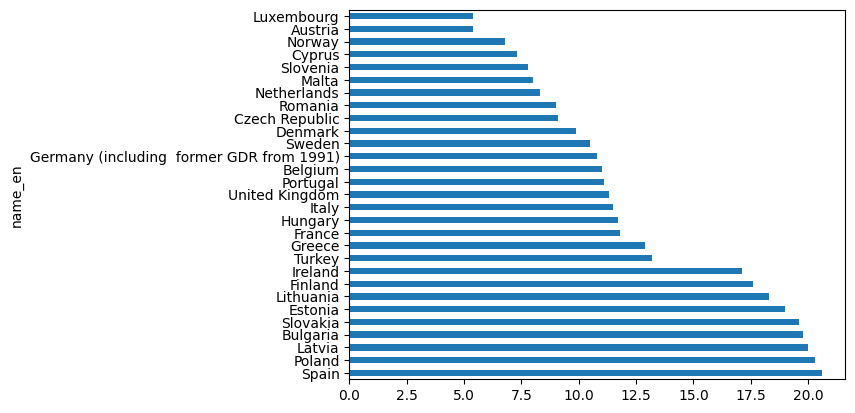

In [80]:
import matplotlib.pyplot as plt
# %matplotlib inline

grouped.plot(kind='barh')

# Nous ajoutons plt.show() pour afficher correctement le graphique
# 我们添加 plt.show() 以正确显示图表
plt.show()

Essayons un autre graphique. Notre DataFrame complet est ce qu'on appelle une série temporelle -- nous avons des observations répétées des taux de chômage de divers pays au fil du temps. Nous traçons généralement les séries temporelles en utilisant des graphiques linéaires, alors créons un graphique linéaire examinant les taux de chômage de l'Espagne et du Portugal.  
让我们尝试另一个图表。我们完整的 DataFrame 是所谓的“时间序列”——我们对各国随时间变化的失业率进行了重复观测。我们通常使用折线图绘制时间序列，所以让我们创建一个折线图来检查西班牙和葡萄牙的失业率。

Pour simplifier ce type de graphique, nous commencerons par faire de notre colonne de date l'index du DataFrame :
为了简化这种类型的图表，我们将首先将日期列作为 DataFrame 的索引：

In [81]:
unemployment_merged = unemployment_merged.set_index('date')

In [82]:
unemployment_merged.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
date,,,,,,,,,,,,,,
1993-01-01,at,sa,1993.01,144000,3.8,1993,1,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1993-02-01,at,sa,1993.02,145000,3.8,1993,2,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1993-03-01,at,sa,1993.03,147000,3.9,1993,3,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1993-04-01,at,sa,1993.04,149000,3.9,1993,4,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598
1993-05-01,at,sa,1993.05,151000,4.0,1993,5,AT,eu,Austria,Autriche,Österreich,47.696554,13.34598


Nous utiliserons également l'indexation booléenne pour sélectionner les observations concernant l'Espagne. Nous sauvegarderons cela comme un nouveau DataFrame, `spain` :
我们还将使用布尔索引来选择有关西班牙的观测结果。我们将把它保存为一个新的 DataFrame `spain`：

In [83]:
spain = unemployment_merged[unemployment_merged['name_en'] == 'Spain']
spain.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
date,,,,,,,,,,,,,,
1986-04-01,es,sa,1986.04,2518000,17.7,1986,4,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-05-01,es,sa,1986.05,2502000,17.5,1986,5,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-06-01,es,sa,1986.06,2481000,17.4,1986,6,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-07-01,es,sa,1986.07,2485000,17.4,1986,7,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-08-01,es,sa,1986.08,2476000,17.3,1986,8,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296


Maintenant nous pouvons facilement accéder au taux de chômage de l'Espagne, avec la date de chaque observation incluse comme index :
现在我们可以轻松访问西班牙的失业率，其中包含每个观测的日期作为索引：

In [84]:
spain['unemployment_rate']

date
1986-04-01    17.7
1986-05-01    17.5
1986-06-01    17.4
1986-07-01    17.4
1986-08-01    17.3
              ... 
2010-07-01    20.3
2010-08-01    20.5
2010-09-01    20.6
2010-11-01    20.4
2010-12-01    20.2
Name: unemployment_rate, Length: 272, dtype: float64

Répétons la même indexation booléenne que nous avons utilisée pour l'Espagne, mais maintenant pour le Portugal :
让我们重复用于西班牙的相同布尔索引，但现在针对葡萄牙：

In [85]:
portugal = unemployment_merged[unemployment_merged['name_en'] == 'Portugal']

In [86]:
spain.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
date,,,,,,,,,,,,,,
1986-04-01,es,sa,1986.04,2518000,17.7,1986,4,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-05-01,es,sa,1986.05,2502000,17.5,1986,5,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-06-01,es,sa,1986.06,2481000,17.4,1986,6,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-07-01,es,sa,1986.07,2485000,17.4,1986,7,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
1986-08-01,es,sa,1986.08,2476000,17.3,1986,8,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296


In [87]:
portugal.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
date,,,,,,,,,,,,,,
1983-01-01,pt,sa,1983.01,345000,7.5,1983,1,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
1983-02-01,pt,sa,1983.02,348000,7.6,1983,2,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
1983-03-01,pt,sa,1983.03,353000,7.7,1983,3,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
1983-04-01,pt,sa,1983.04,359000,7.9,1983,4,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
1983-05-01,pt,sa,1983.05,366000,8.0,1983,5,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941


Nous profiterons de la fonction `.plot()`, en appelant simplement `spain['unemployment_rate'].plot()`. Nous n'avons pas besoin de fournir d'argument à `.plot()` puisque nous utilisons le style de graphique par défaut -- un graphique linéaire. Nous ajoutons cependant quelques autres commandes pour ajouter une étiquette d'axe y et afficher le graphique.
我们将利用 `.plot()` 函数，只需调用 `spain['unemployment_rate'].plot()`。我们不需要向 `.plot()` 提供参数，因为我们使用默认的图表样式——折线图。但是，我们添加了一些其他命令来添加 y 轴标签并显示图表。

In [88]:
spain['unemployment_rate']

date
1986-04-01    17.7
1986-05-01    17.5
1986-06-01    17.4
1986-07-01    17.4
1986-08-01    17.3
              ... 
2010-07-01    20.3
2010-08-01    20.5
2010-09-01    20.6
2010-11-01    20.4
2010-12-01    20.2
Name: unemployment_rate, Length: 272, dtype: float64

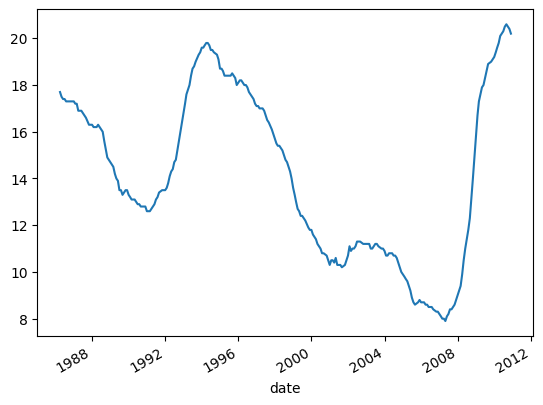

In [89]:
spain['unemployment_rate'].plot()

# Nous ajoutons plt.show() pour afficher correctement le graphique
# 我们添加 plt.show() 以正确显示图表
plt.show()

La superposition de graphiques impliquera simplement d'appeler plusieurs commandes `.plot()` dans la même cellule Jupyter. Nous pouvons également ajouter un style de base, comme des étiquettes, une légende et un titre.
叠加图表只需要在同一个 Jupyter 单元格中调用多个 `.plot()` 命令。我们还可以添加基本样式，如标签、图例和标题。

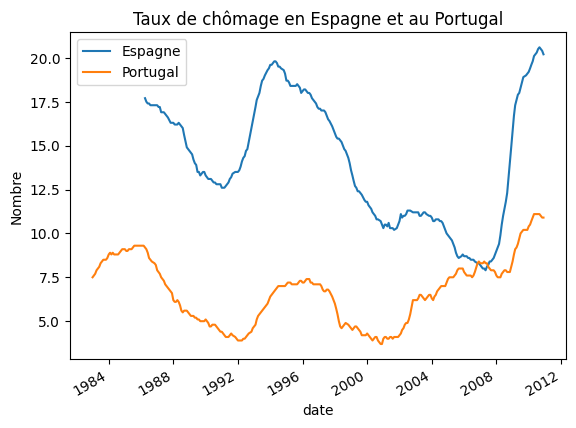

In [90]:
# Commandes de graphique
# 图表命令
spain['unemployment_rate'].plot()
portugal['unemployment_rate'].plot()

# Style
# 样式
plt.legend(["Espagne", "Portugal"])
plt.ylabel("Nombre")
plt.title("Taux de chômage en Espagne et au Portugal")
plt.show()